# Explorar os dados com o Azure Databricks

Na página Novo cluster, criei um novo cluster com as seguintes configurações:

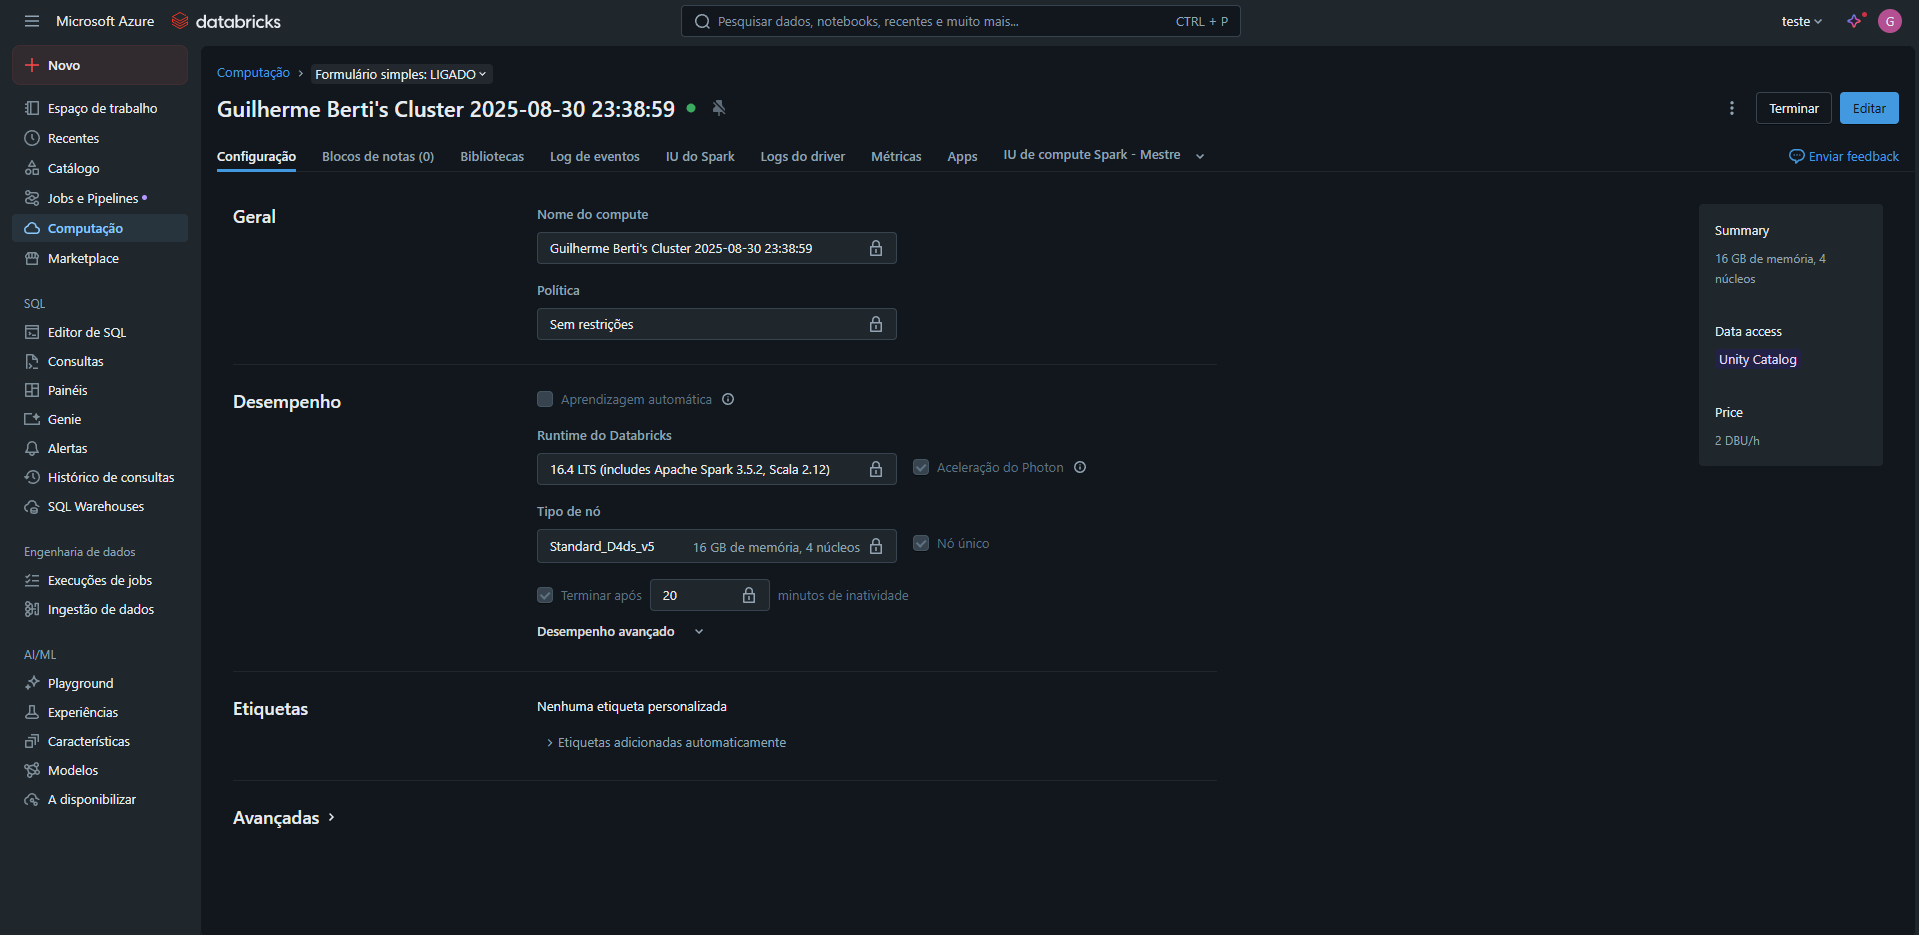

Fiz a inicialização de um novo notebook 'Explorar dados com Spark'

**Ingerindo dados**

Na primeira célula do notebook, inseri o código a seguir, que usa comandos de shell para baixar arquivos de dados do GitHub para o sistema de arquivos usado pelo meu cluster.

In [ ]:
 %sh
 rm -r /dbfs/spark_lab
 mkdir /dbfs/spark_lab
 wget -O /dbfs/spark_lab/2019.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2019.csv
 wget -O /dbfs/spark_lab/2020.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2020.csv
 wget -O /dbfs/spark_lab/2021.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2021.csv

**Consultando dados em arquivos**

inseri e executei o seguinte código para carregar os dados dos arquivos e visualizar as primeiras 100 linhas.

In [ ]:
df = spark.read.load('spark_lab/*.csv', format='csv')
display(df.limit(100))

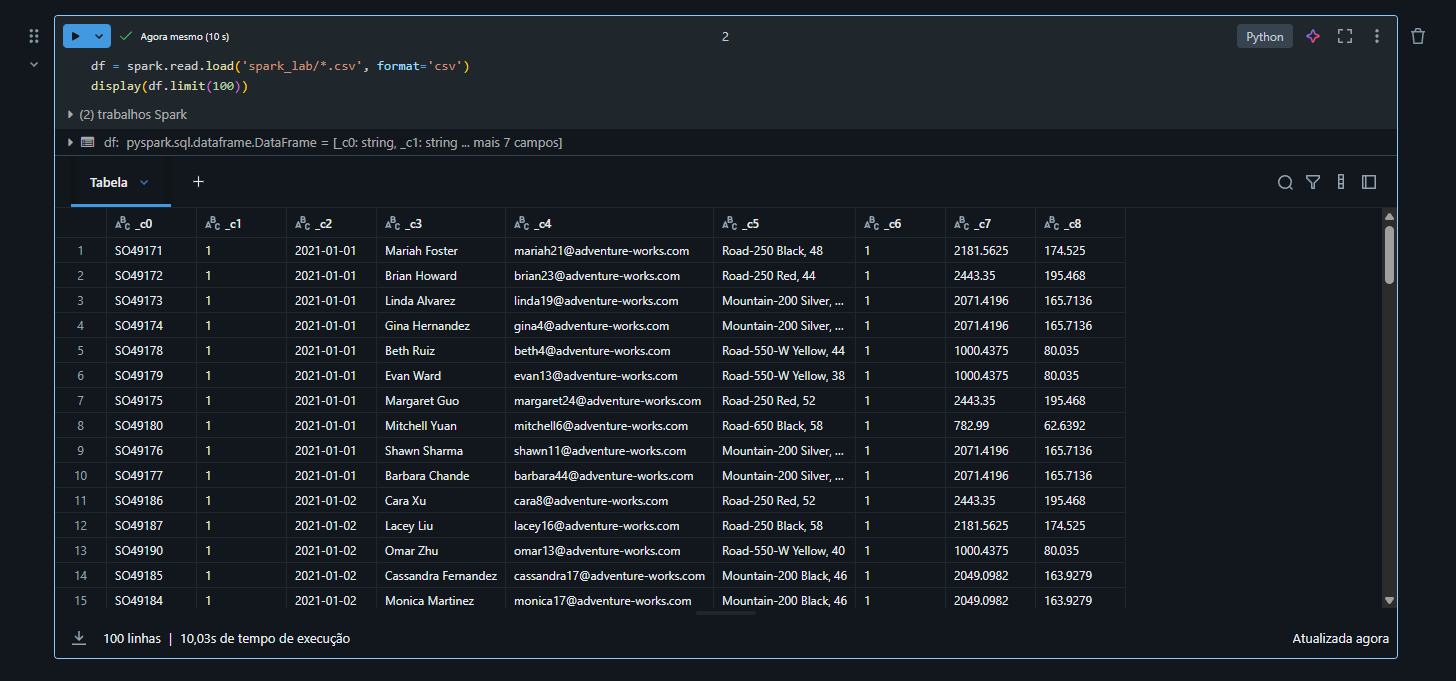

**Definindo um esquema para os dados:**

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
])
df = spark.read.load('/spark_lab/*.csv', format='csv', schema=orderSchema)
display(df.limit(100))

Desta vez, o dataframe inclui cabeçalhos de coluna:

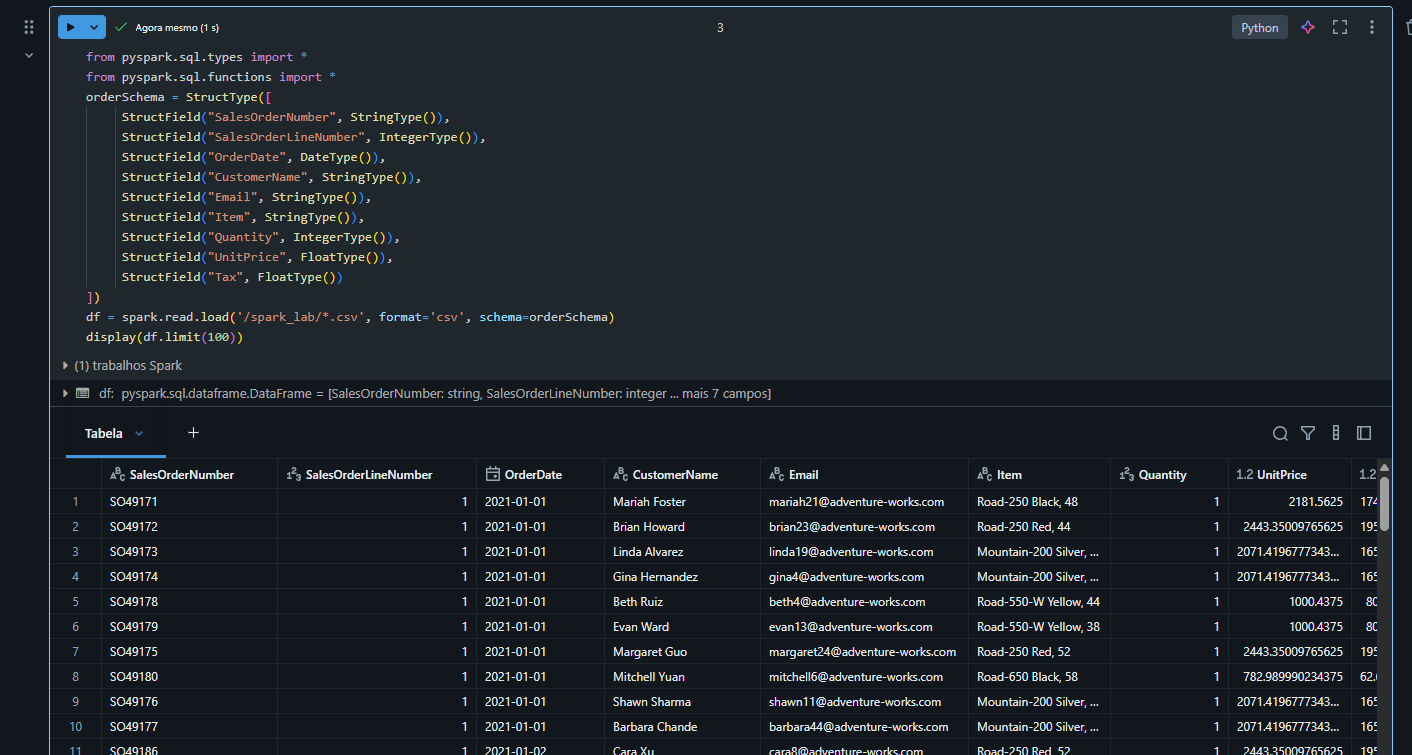

Executei o seguinte código para exibir detalhes do esquema do dataframe e verificar se os tipos de dados corretos foram aplicados:

In [ ]:
df.printSchema()

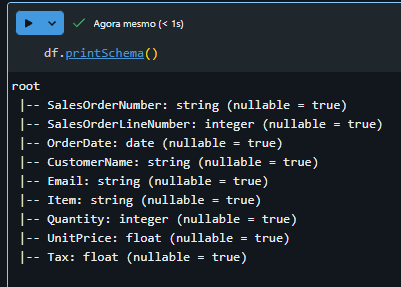

**Consultando dados usando Spark SQL**

Spark SQL é uma API de linguagem SQL no Spark que utilizo para executar instruções SQL ou até mesmo persistir dados em tabelas relacionais.

O código a seguir cria uma visualização relacional dos dados em um dataframe e, em seguida, usa a biblioteca spark.sql para incorporar a sintaxe Spark SQL ao seu código Python, consultar a visualização e retornar os resultados como um dataframe.

In [ ]:
df.createOrReplaceTempView("salesorders")
spark_df = spark.sql("SELECT * FROM salesorders")
display(spark_df)

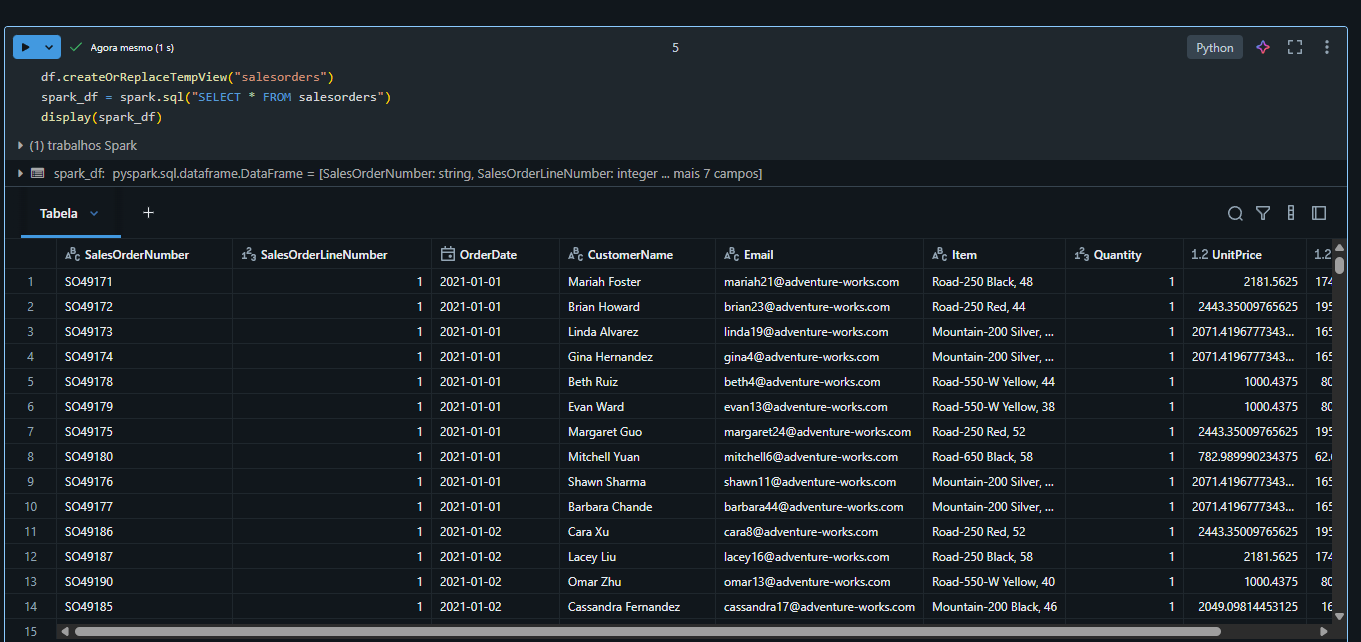

**Visualizando os resultados como uma view**

código para consultar a tabela salesorders:

In [ ]:
%sql

SELECT * FROM salesorders

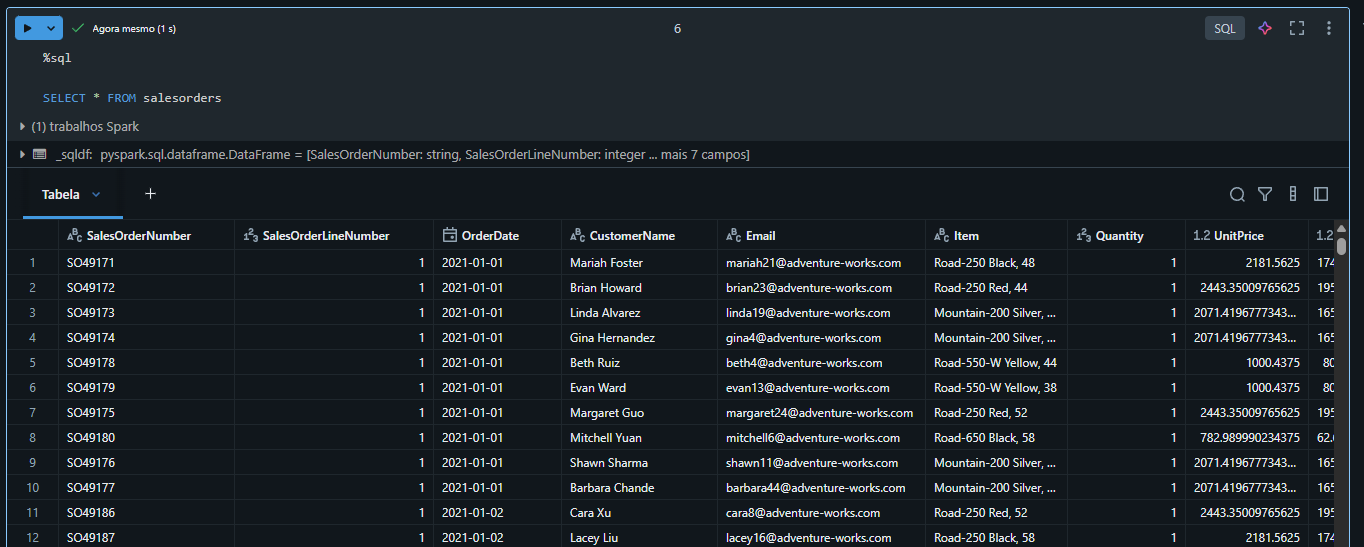

Criei uma vizualização, para melhor apresentação dos dados

Visualization type: Bar
X Column: Item
Y Column: Quantity. Sum aggregation.

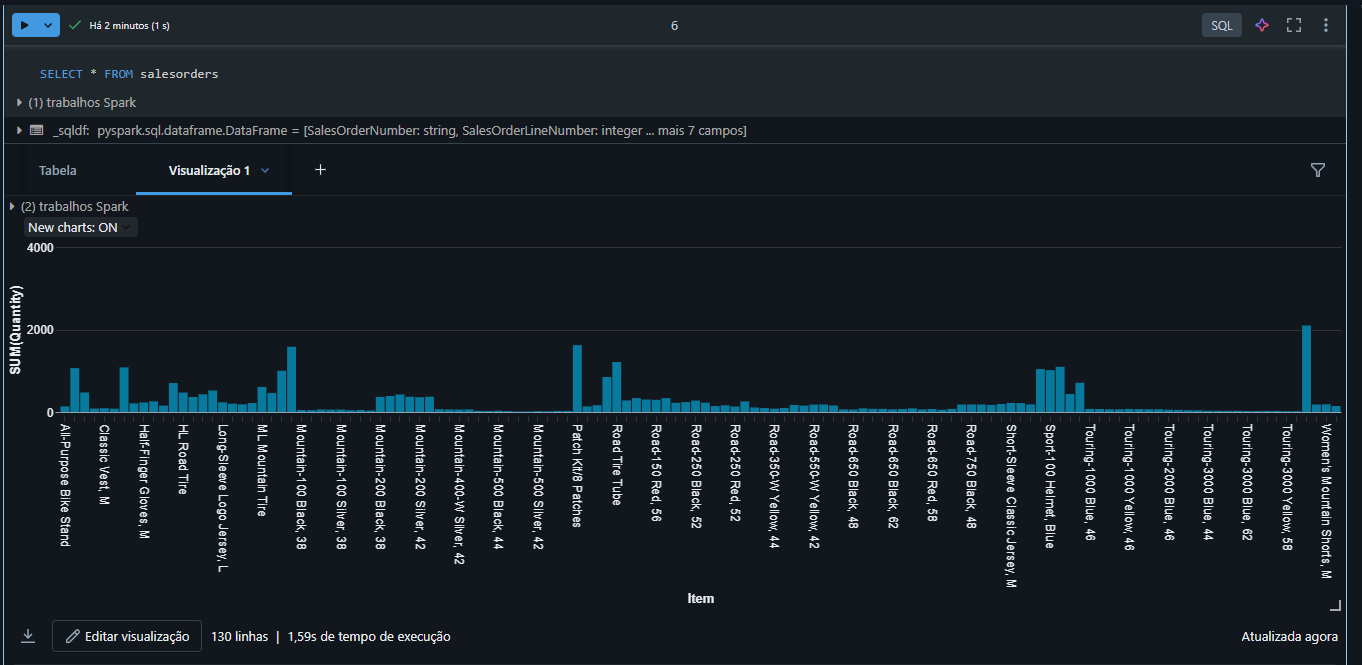

**matplotlib**

executei o seguinte código para recuperar alguns dados do pedido de vendas em um dataframe:

In [ ]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
         FROM salesorders \
         GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
         ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

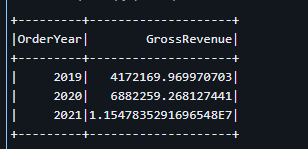

Utilizei o seguinte código, que importa o matplotlib e o utilizei para criar um gráfico:

In [ ]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()
# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])
# Display the plot
plt.show()

Resultado gráfico de colunas com a receita bruta total de cada ano:

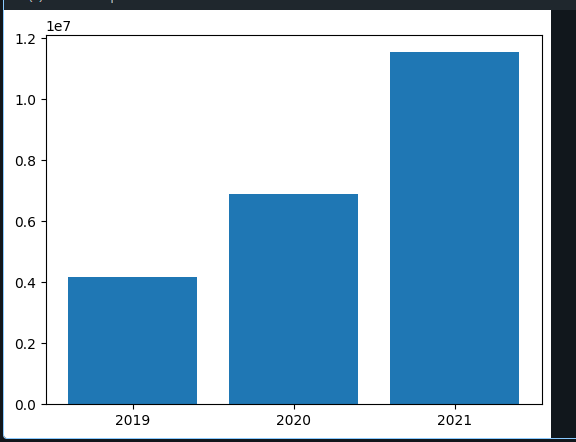

A biblioteca matplotlib requer um dataframe Pandas, então faço a converão do dataframe Spark retornado pela consulta Spark SQL para este formato.

As configurações padrão resultam em um gráfico utilizável, mas há bastante espaço para personalizá-lo:

In [ ]:
# Clear the plot area
plt.clf()
# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)
# Show the figure
plt.show()

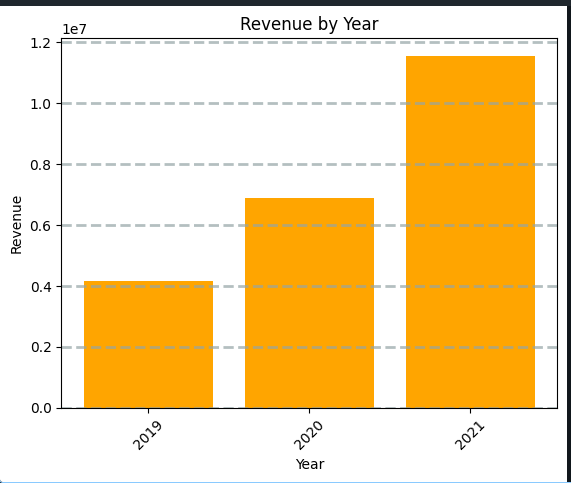

Uma figura pode conter vários subgráficos, cada um em seu próprio eixo. Então utilizei código para criar vários gráficos:

In [ ]:
# Clear the plot area
plt.clf()
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))
# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')
# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())
# Add a title to the Figure
fig.suptitle('Sales Data')
# Show the figure
plt.show()

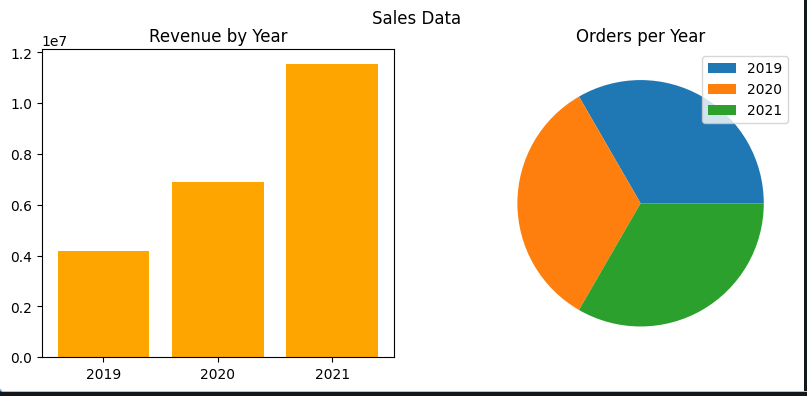

**Utilizando a biblioteca seaborn**

exemplo:



In [ ]:
import seaborn as sns

# Clear the plot area
plt.clf()
# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

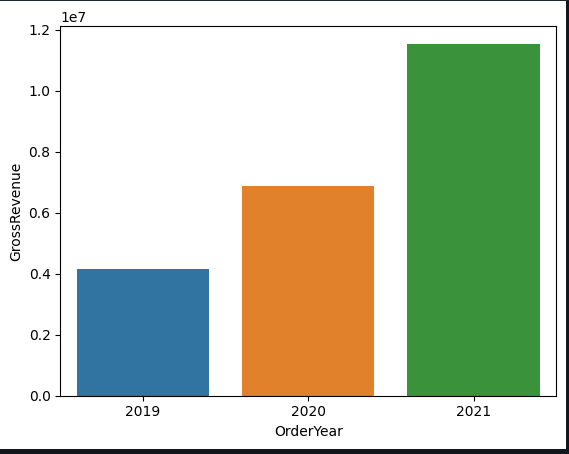

A biblioteca Seaborn simplifica a criação de gráficos complexos de dados estatísticos e permite controlar o tema visual para visualizações de dados consistentes:

In [ ]:
# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

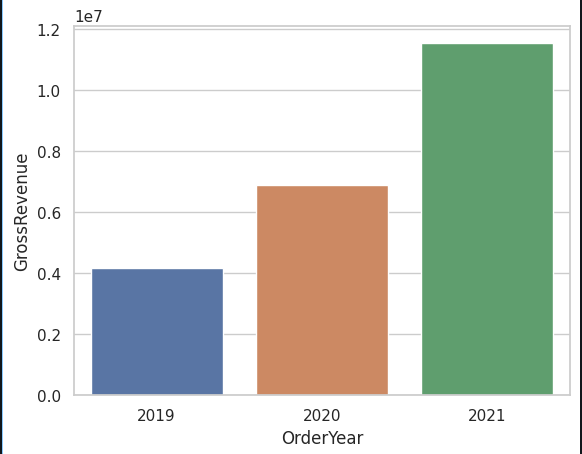

Assim como o matplotlib, o seaborn suporta vários tipos de gráficos:

In [ ]:
# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

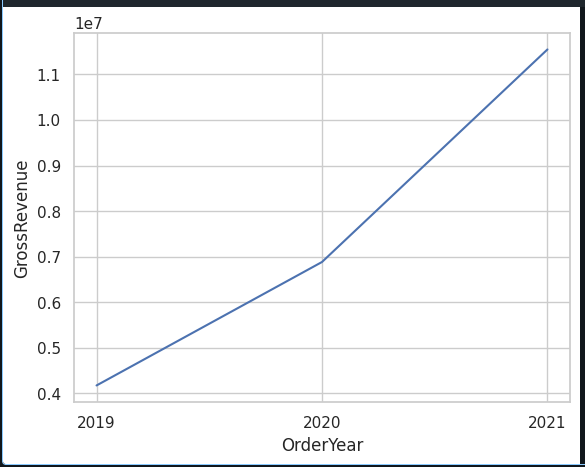